In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from pathlib import Path
from sklearn.metrics import roc_auc_score, average_precision_score

In [6]:
roc_dir = Path('../roc_curves')
experiment_names = ['dMaSIF_search_3layer_12A_16dim', 'dMaSIF_search_3layer_12A_epoch47','dMaSIF_search_3layer_12A_1_epoch43','dMaSIF_search_3layer_12A_2_epoch48', 'dMaSIF_search_3layer_12A_3_epoch47', 'dMaSIF_search_3layer_12A_4_epoch45', 'dMaSIF_search_3layer_12A_5_epoch48']
short_names = ['original', 'reproducing results','Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']   
#

original 0.8671593215565171 0.966266996962563
reproducing results 0.8804885788599232 0.9700586781736732
Fold 1 0.8145121157859436 0.9342091620394356
Fold 2 0.8245819091968475 0.9287417576772803
Fold 3 0.8226340000695819 0.9298693581912185
Fold 4 0.8217293979814606 0.9345720019699866
Fold 5 0.8316973089782941 0.9354424912461515


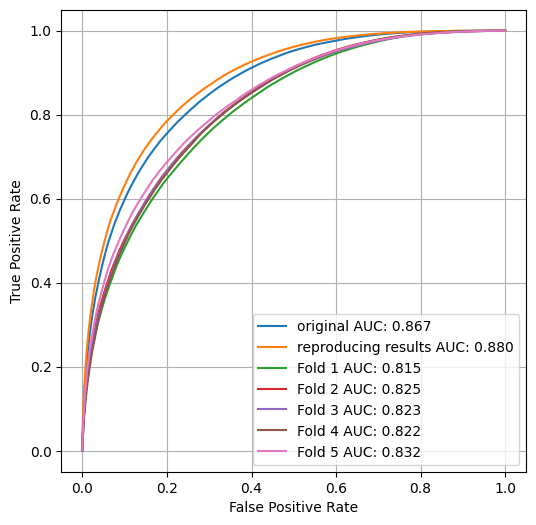

In [7]:
fig = plt.figure(figsize=(6,6))
for exp,sn in zip(experiment_names,short_names):
    fpr = np.load(roc_dir/f'{exp}_fpr.npy')
    tpr = np.load(roc_dir/f'{exp}_tpr.npy')
    labels = np.load(roc_dir/f'{exp}_all_labels.npy')
    preds = np.load(roc_dir/f'{exp}_all_preds.npy')
    print(sn,roc_auc_score(labels,preds), average_precision_score(labels,preds))
    plt.plot(fpr,tpr,label=sn + f' AUC: {roc_auc_score(labels,preds):.3f}')
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend( loc="lower right")
# save the figure as square imag
fig.savefig('roc_curves.png', dpi=500)#, bbox_inches='tight')
#plt.savefig('roc_curves.png', dpi=500)